# LAB 02: Data mining and visualization

### Team information

Class : 22KHDL

|Student's ID| Name |
|------------|--------------|
|22127460| Quách Trần Quán Vinh|
|22127478| Nguyễn Hoàng Trung Kiên|

### Import libraries

- Libraries to handle and visualize data

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import plotly.express as px
from math import pi

- Libraries to handle missing values by algorithms

In [2]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor

- Library to handle world map data

In [3]:
import geopandas as gpd

## 1. Data collection and preprocessing

### 1.1. Collecting data

The data is collected from [World Development Indicators](https://databank.worldbank.org/source/world-development-indicators#) database. We collect features based on environmental status around the world of all countries in 1990, 2000 and 2014 - 2023.

### 1.2. Preprocessing data

- Read data 

In [4]:
df = pd.read_excel('data/P_environment.xlsx')
df

,Country Name,Country Code,Series Name,Series Code,1990 [YR1990],2000 [YR2000],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,Afghanistan,AFG,Carbon dioxide (CO2) emissions (total) excludi...,EN.GHG.CO2.MT.CE.AR5,2.9222,1.0161,7.8257,8.3465,7.5276,8.0661,7.932,7.2491,7.0541,7.9308,8.2599,8.7073
1,Afghanistan,AFG,Nitrous oxide (N2O) emissions (total) excludin...,EN.GHG.N2O.MT.CE.AR5,2.0316,2.4473,3.8005,3.8415,3.9607,4.4631,3.9337,3.9491,3.6824,3.5777,3.5457,3.557
2,Afghanistan,AFG,Methane (CH4) emissions (total) excluding LULU...,EN.GHG.CH4.MT.CE.AR5,7.6437,10.4209,15.5429,14.9348,14.8077,14.773,15.2334,15.2741,15.3417,15.507,16.1232,16.4523
3,Afghanistan,AFG,Total greenhouse gas emissions excluding LULUC...,EN.GHG.ALL.MT.CE.AR5,12.5616,13.9157,27.4201,27.4083,26.634,27.6919,27.5533,26.9828,26.6463,27.6431,28.6141,29.4601
4,Afghanistan,AFG,Total greenhouse gas emissions excluding LULUC...,EN.GHG.ALL.PC.CE.AR5,1.042832,0.69128,0.836169,0.810135,0.767537,0.775924,0.749892,0.712772,0.682032,0.69107,0.705148,0.710657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8249,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The data is read in the excel format.

There are two final lines of the data has data information, so we will drop those two lines.

In [5]:
df = df.iloc[:-2]

We convert each ```Series Name``` value into each column

In [6]:
df_long = pd.melt(
    df,
    id_vars=["Country Name", "Country Code", "Series Name", "Series Code"],
    value_vars=[col for col in df.columns if "YR" in col],
    var_name="Year",
    value_name="Value"
)

df_long_clean = df_long.dropna(subset=["Country Name", "Country Code", "Series Name"]).copy()
df = df_long_clean.pivot_table(
    index=["Country Name", "Country Code", "Year"],
    columns="Series Name",
    values="Value",
    aggfunc="first" 
).reset_index()
df.columns.name = None

- Data information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 34 columns):
 #   Column                                                                                            Non-Null Count  Dtype 
---  ------                                                                                            --------------  ----- 
 0   Country Name                                                                                      3192 non-null   object
 1   Country Code                                                                                      3192 non-null   object
 2   Year                                                                                              3192 non-null   object
 3   Access to clean fuels and technologies for cooking (% of population)                              3192 non-null   object
 4   Access to clean fuels and technologies for cooking, rural (% of rural population)                 3192 non-null   object
 5   Access

In [8]:
df.shape

(3192, 34)

The raw data now has 3192 rows and 34 columns.

- Data columns

In [9]:
print(df.columns)

Index(['Country Name', 'Country Code', 'Year',
       'Access to clean fuels and technologies for cooking (% of population)',
       'Access to clean fuels and technologies for cooking, rural (% of rural population)',
       'Access to clean fuels and technologies for cooking, urban (% of urban population)',
       'Adjusted net savings, including particulate emission damage (% of GNI)',
       'Adjusted savings: carbon dioxide damage (% of GNI)',
       'Adjusted savings: consumption of fixed capital (% of GNI)',
       'Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)',
       'Annual freshwater withdrawals, domestic (% of total freshwater withdrawal)',
       'Annual freshwater withdrawals, industry (% of total freshwater withdrawal)',
       'Annual freshwater withdrawals, total (% of internal resources)',
       'Annual freshwater withdrawals, total (billion cubic meters)',
       'Carbon dioxide (CO2) emissions (total) excluding LULUCF (Mt CO2e)',
   

- Handle duplicates

In [10]:
df.duplicated().sum()

np.int64(0)

There are no duplicates.

- Handle missing values

Through the dataset, some missing values instead of being represented by ```NaN```, they are represented by ```..```, so we convert them into ```NaN```.

In [11]:
pd.set_option('future.no_silent_downcasting', True)
df.replace('..', np.nan, inplace=True)
df.isna().sum()

Country Name                                                                                           0
Country Code                                                                                           0
Year                                                                                                   0
Access to clean fuels and technologies for cooking (% of population)                                 822
Access to clean fuels and technologies for cooking, rural (% of rural population)                    822
Access to clean fuels and technologies for cooking, urban (% of urban population)                    822
Adjusted net savings, including particulate emission damage (% of GNI)                              1391
Adjusted savings: carbon dioxide damage (% of GNI)                                                   815
Adjusted savings: consumption of fixed capital (% of GNI)                                            806
Annual freshwater withdrawals, agriculture (% of total 

So there are some missing values in some columns.

We remove the columns that have missing proportion higher than 50%.

In [12]:
threshold = len(df) * 0.5
df.dropna(axis=1, thresh=threshold, inplace=True)

To handle missing values, we first identify which columns have below or above 10% missing values. If columns have low missing values, we just fill them by ```median```. The other we fill them by ```Iterative Imputer``` with ```Random Forest Regressor``` estimator.

**Reasons:**
- Low missing columns' distribution will not be affected much when filling by ```median```.
- Most of the columns have high missing values, and their distribution may vary.
- The columns are continous variable so it is suitable to fill with ```Random Forest Regressor``` estimator.

We convert and make sure year is in ```int``` type first.

In [13]:
df_encoded = df.copy()
df_encoded['Year'] = df_encoded['Year'].str.extract(r'(\d{4})').astype(int)

Encode ```Country Name``` and ```Country Code``` using ```LabelEncoder```, converting category data into numerical ordinal data ([0, 1, 2...]). They are not ordinal data, but to enhance the process of filling missing values' runtime and space, we use it for simplicity. Using this instead of ```One hot Encoding``` makes the ```Iterative Imputer``` runs faster since the core of that method is to use loops through columns if it is just for filling missing values process.

In [14]:
label_encoders = {}
for col in ['Country Name', 'Country Code']:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le 

We calculate missing ratio of each columns and define whether they are high or low missing columns, with threshold is 10%.

In [15]:
missing_ratio = df_encoded.isnull().mean()
low_missing_cols = missing_ratio[missing_ratio <= 0.1].index  
high_missing_cols = missing_ratio[missing_ratio > 0.1].index 

Fill low missing columns by ```median```.

In [16]:
df_encoded[low_missing_cols] = df_encoded[low_missing_cols].fillna(df_encoded[low_missing_cols].median())

Scale columns using ```Standard Scaler``` to fill the other columns by ```Iterative Imputer```.

In [17]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

Fill the remain missing columns by ```Iterative Imputer``` with ```Random Forest Regressor``` estimator.

**How Iterative Imputer works [[1]](https://www.geeksforgeeks.org/handling-missing-data-with-iterativeimputer-in-scikit-learn/):**

1. Initialization: The algorithm starts by initializing the missing values with a random or mean imputation.
2. Feature Selection: The algorithm selects a feature to impute, typically in a round-robin fashion.
3. Imputation: The selected feature is imputed using a regression model, which predicts the missing values based on the observed values of the other features.
4. Update: The imputed values are updated, and the process is repeated for the next feature.
5. Convergence: The algorithm continues until convergence, which is typically determined by a stopping criterion such as a maximum number of iterations or a tolerance threshold.

**How Random Forest Regressor works [[2]](https://www.geeksforgeeks.org/random-forest-regression-in-python/):**

Random Forest Regression works by creating multiple of decision trees each trained on a random subset of the data. The process begins with Bootstrap sampling where random rows of data are selected with replacement to form different training datasets for each tree. After this we do feature sampling where only a random subset of features is used to build each tree ensuring diversity in the models.

After the trees are trained each tree make a prediction and the final prediction for regression tasks is the average of all the individual tree predictions



We choose:

1. For ```Iterative Imputer```: 

- ```max_iter = 5```: Runs the imputation process for 5 iterations, balancing accuracy and speed.
- ```random_state = 42```: Ensures consistent filling results.

2. For ```Random Forest Regressor```:

- ```n_estimators = 30```: Uses 30 decision trees, balancing accuracy and speed.
- ```n_job = -1```:  Uses all available CPU cores for faster process.

In [18]:
df_numeric = pd.DataFrame(df_scaled, columns=df_encoded.columns)

imputer = IterativeImputer(
    estimator=RandomForestRegressor(n_estimators=30, random_state=42, n_jobs=-1),
    max_iter=5,
    random_state=42  
)
df_imputed = imputer.fit_transform(df_numeric)  
df_final = pd.DataFrame(scaler.inverse_transform(df_imputed), columns=df_encoded.columns)

for col in ['Country Name', 'Country Code']:
    df_final[col] = df_final[col].round().astype(int)  
    df_final[col] = label_encoders[col].inverse_transform(df_final[col])

df = df_final.copy()

c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


**Note:** This process takes approximately 3-4 minutes on our personal computer.

Check the missing values again.

In [19]:
df.isna().sum()

Country Name                                                                                        0
Country Code                                                                                        0
Year                                                                                                0
Access to clean fuels and technologies for cooking (% of population)                                0
Access to clean fuels and technologies for cooking, rural (% of rural population)                   0
Access to clean fuels and technologies for cooking, urban (% of urban population)                   0
Adjusted net savings, including particulate emission damage (% of GNI)                              0
Adjusted savings: carbon dioxide damage (% of GNI)                                                  0
Adjusted savings: consumption of fixed capital (% of GNI)                                           0
Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)     

The data now has no missing values.

- Handle data format

We take a look through the data types.

In [20]:
df.dtypes

Country Name                                                                                         object
Country Code                                                                                         object
Year                                                                                                float64
Access to clean fuels and technologies for cooking (% of population)                                float64
Access to clean fuels and technologies for cooking, rural (% of rural population)                   float64
Access to clean fuels and technologies for cooking, urban (% of urban population)                   float64
Adjusted net savings, including particulate emission damage (% of GNI)                              float64
Adjusted savings: carbon dioxide damage (% of GNI)                                                  float64
Adjusted savings: consumption of fixed capital (% of GNI)                                           float64
Annual freshwater withdrawal

When looking through the data, we see that ```Year``` column is in ```float``` type, we convert it into ```int``` type.

In [21]:
df['Year'] = df['Year'].astype(int)

### Data after being preprocessed

In [22]:
df

,Country Name,Country Code,Year,Access to clean fuels and technologies for cooking (% of population),"Access to clean fuels and technologies for cooking, rural (% of rural population)","Access to clean fuels and technologies for cooking, urban (% of urban population)","Adjusted net savings, including particulate emission damage (% of GNI)",Adjusted savings: carbon dioxide damage (% of GNI),Adjusted savings: consumption of fixed capital (% of GNI),"Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)",...,"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",Renewable energy consumption (% of total final energy consumption),Renewable internal freshwater resources per capita (cubic meters),"Renewable internal freshwater resources, total (billion cubic meters)",Terrestrial and marine protected areas (% of total territorial area),Terrestrial protected areas (% of total land area),Total greenhouse gas emissions excluding LULUCF (Mt CO2e),Total greenhouse gas emissions excluding LULUCF per capita (t CO2e/capita),"Water productivity, total (constant 2015 US$ GDP per cubic meter of total freshwater withdrawal)"
0,Afghanistan,AFG,1990,33.866667,17.313929,77.435000,13.891952,0.982271,7.357844,98.914854,...,68.742333,93.347541,23.000000,3914.272858,47.150000,19.932546,24.482218,12.5616,1.042832,2.128989
1,Afghanistan,AFG,2000,5.500000,0.800000,25.300000,7.675032,2.855872,6.489027,98.606201,...,19.745178,54.606478,45.000000,2342.237163,47.150000,21.341431,23.975150,13.9157,0.691280,0.306013
2,Afghanistan,AFG,2014,26.100000,10.200000,78.000000,9.872376,0.799648,7.774864,98.169627,...,52.247964,82.142599,19.100000,1437.827763,47.150000,21.257148,23.207008,27.4201,0.836169,0.929913
3,Afghanistan,AFG,2015,27.600000,11.400000,79.500000,10.643952,1.025318,7.670384,98.169627,...,55.089416,84.441678,17.700000,1393.660703,47.150000,21.869732,23.259014,27.4083,0.810135,0.943409
4,Afghanistan,AFG,2016,28.800000,12.600000,80.500000,6.169441,1.045826,7.181729,98.169627,...,57.970101,86.755310,20.200000,1358.765661,47.150000,0.104707,0.100000,26.6340,0.767537,0.964733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3187,Zimbabwe,ZWE,2019,30.300000,6.700000,78.800000,5.664455,2.231775,8.864952,84.826632,...,48.871548,93.029902,81.000000,802.809545,12.260000,27.214747,27.214750,28.3694,1.857686,4.867751
3188,Zimbabwe,ZWE,2020,30.500000,6.900000,78.600000,1.454492,2.112573,9.377614,87.200183,...,48.282429,92.895129,84.100000,789.598019,12.260000,27.214747,27.214750,26.7706,1.724145,3.871768
3189,Zimbabwe,ZWE,2021,30.500000,7.100000,78.400000,5.285084,1.805455,9.856066,87.200183,...,47.695513,92.760319,82.400000,776.086410,12.260000,27.214747,27.214746,28.8784,1.828070,4.199630
3190,Zimbabwe,ZWE,2022,30.800000,7.200000,78.200000,2.212461,1.540324,10.123002,69.674940,...,47.695513,92.760319,79.530417,17067.890234,189.284017,27.214747,27.214747,29.8254,1.856077,17.792175


Store data into csv.

In [23]:
df.to_csv('./data/Environment Data Preprocessed.csv')

In [24]:
df

,Country Name,Country Code,Year,Access to clean fuels and technologies for cooking (% of population),"Access to clean fuels and technologies for cooking, rural (% of rural population)","Access to clean fuels and technologies for cooking, urban (% of urban population)","Adjusted net savings, including particulate emission damage (% of GNI)",Adjusted savings: carbon dioxide damage (% of GNI),Adjusted savings: consumption of fixed capital (% of GNI),"Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)",...,"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",Renewable energy consumption (% of total final energy consumption),Renewable internal freshwater resources per capita (cubic meters),"Renewable internal freshwater resources, total (billion cubic meters)",Terrestrial and marine protected areas (% of total territorial area),Terrestrial protected areas (% of total land area),Total greenhouse gas emissions excluding LULUCF (Mt CO2e),Total greenhouse gas emissions excluding LULUCF per capita (t CO2e/capita),"Water productivity, total (constant 2015 US$ GDP per cubic meter of total freshwater withdrawal)"
0,Afghanistan,AFG,1990,33.866667,17.313929,77.435000,13.891952,0.982271,7.357844,98.914854,...,68.742333,93.347541,23.000000,3914.272858,47.150000,19.932546,24.482218,12.5616,1.042832,2.128989
1,Afghanistan,AFG,2000,5.500000,0.800000,25.300000,7.675032,2.855872,6.489027,98.606201,...,19.745178,54.606478,45.000000,2342.237163,47.150000,21.341431,23.975150,13.9157,0.691280,0.306013
2,Afghanistan,AFG,2014,26.100000,10.200000,78.000000,9.872376,0.799648,7.774864,98.169627,...,52.247964,82.142599,19.100000,1437.827763,47.150000,21.257148,23.207008,27.4201,0.836169,0.929913
3,Afghanistan,AFG,2015,27.600000,11.400000,79.500000,10.643952,1.025318,7.670384,98.169627,...,55.089416,84.441678,17.700000,1393.660703,47.150000,21.869732,23.259014,27.4083,0.810135,0.943409
4,Afghanistan,AFG,2016,28.800000,12.600000,80.500000,6.169441,1.045826,7.181729,98.169627,...,57.970101,86.755310,20.200000,1358.765661,47.150000,0.104707,0.100000,26.6340,0.767537,0.964733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3187,Zimbabwe,ZWE,2019,30.300000,6.700000,78.800000,5.664455,2.231775,8.864952,84.826632,...,48.871548,93.029902,81.000000,802.809545,12.260000,27.214747,27.214750,28.3694,1.857686,4.867751
3188,Zimbabwe,ZWE,2020,30.500000,6.900000,78.600000,1.454492,2.112573,9.377614,87.200183,...,48.282429,92.895129,84.100000,789.598019,12.260000,27.214747,27.214750,26.7706,1.724145,3.871768
3189,Zimbabwe,ZWE,2021,30.500000,7.100000,78.400000,5.285084,1.805455,9.856066,87.200183,...,47.695513,92.760319,82.400000,776.086410,12.260000,27.214747,27.214746,28.8784,1.828070,4.199630
3190,Zimbabwe,ZWE,2022,30.800000,7.200000,78.200000,2.212461,1.540324,10.123002,69.674940,...,47.695513,92.760319,79.530417,17067.890234,189.284017,27.214747,27.214747,29.8254,1.856077,17.792175


## 2. Data visualization

### 2.1. Data introduction

#### 2.1.1. Introduction

Data is about environmental status of the world.

#### 2.1.2. Sample size

In [25]:
df.shape

(3192, 31)

The data now has 3192 rows and 31 columns.

#### 2.1.3. Structures

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 31 columns):
 #   Column                                                                                            Non-Null Count  Dtype  
---  ------                                                                                            --------------  -----  
 0   Country Name                                                                                      3192 non-null   object 
 1   Country Code                                                                                      3192 non-null   object 
 2   Year                                                                                              3192 non-null   int64  
 3   Access to clean fuels and technologies for cooking (% of population)                              3192 non-null   float64
 4   Access to clean fuels and technologies for cooking, rural (% of rural population)                 3192 non-null   float64
 5  

**Meaning of each columns:**

| # | Column Name                         | Description |
|--|--------------------------------------|-------------|
|1| `Country Name`                       | Country's name |
|2| `Country Code`                       | Country's Code |
|3| `Year`                               | Year |
|4| `Access to clean fuels and technologies for cooking (% of population)` | Access to clean fuels and technologies for cooking is the proportion of total population primarily using clean cooking fuels and technologies for cooking. Under WHO guidelines, kerosene is excluded from clean cooking fuels |
|5| `Access to clean fuels and technologies for cooking, rural (% of rural population) ` | Access to clean fuels and technologies for cooking, rural is the proportion of rural population primarily using clean cooking fuels and technologies for cooking. Under WHO guidelines, kerosene is excluded from clean cooking fuels |
|6| `Access to clean fuels and technologies for cooking, urban (% of urban population)` | Access to clean fuels and technologies for cooking, urban is the proportion of urban population primarily using clean cooking fuels and technologies for cooking. Under WHO guidelines, kerosene is excluded from clean cooking fuels |
|7| `Adjusted net savings, including particulate emission damage (% of GNI)` | Adjusted net savings are equal to net national savings plus education expenditure and minus energy depletion, mineral depletion, net forest depletion, and carbon dioxide and particulate emissions damage |
|8| `Adjusted savings: carbon dioxide damage (% of GNI)` | Cost of damage due to carbon dioxide emissions from fossil fuel use and the manufacture of cement, estimated to be US$40 per ton of CO2 (the unit damage in 2017 US dollars for CO2 emitted in 2020) times the number of tons of CO2 emitted |
|9| `Adjusted savings: consumption of fixed capital (% of GNI)` | Consumption of fixed capital represents the replacement value of capital used up in the process of production |
|10| `Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)` | Annual freshwater withdrawals refer to total water withdrawals, not counting evaporation losses from storage basins. Withdrawals also include water from desalination plants in countries where they are a significant source. Withdrawals can exceed 100 percent of total renewable resources where extraction from nonrenewable aquifers or desalination plants is considerable or where there is significant water reuse. Withdrawals for agriculture are total withdrawals for irrigation and livestock production. Data are for the most recent year available for 1987-2002 |
|11| `Annual freshwater withdrawals, domestic (% of total freshwater withdrawal)` | Annual freshwater withdrawals refer to total water withdrawals, not counting evaporation losses from storage basins. Withdrawals also include water from desalination plants in countries where they are a significant source. Withdrawals can exceed 100 percent of total renewable resources where extraction from nonrenewable aquifers or desalination plants is considerable or where there is significant water reuse. Withdrawals for domestic uses include drinking water, municipal use or supply, and use for public services, commercial establishments, and homes. Data are for the most recent year available for 1987-2002 |
|12| `Annual freshwater withdrawals, industry (% of total freshwater withdrawal)` | Annual freshwater withdrawals refer to total water withdrawals, not counting evaporation losses from storage basins. Withdrawals also include water from desalination plants in countries where they are a significant source. Withdrawals can exceed 100 percent of total renewable resources where extraction from nonrenewable aquifers or desalination plants is considerable or where there is significant water reuse. Withdrawals for industry are total withdrawals for direct industrial use (including withdrawals for cooling thermoelectric plants). Data are for the most recent year available for 1987-2002 |
|13| `Annual freshwater withdrawals, total (% of internal resources)` | Annual freshwater withdrawals refer to total water withdrawals, not counting evaporation losses from storage basins. Withdrawals also include water from desalination plants in countries where they are a significant source. Withdrawals can exceed 100 percent of total renewable resources where extraction from nonrenewable aquifers or desalination plants is considerable or where there is significant water reuse. Withdrawals for agriculture and industry are total withdrawals for irrigation and livestock production and for direct industrial use (including withdrawals for cooling thermoelectric plants). Withdrawals for domestic uses include drinking water, municipal use or supply, and use for public services, commercial establishments, and homes. Data are for the most recent year available for 1987-2002 |
|14| `Annual freshwater withdrawals, total (billion cubic meters)` | Annual freshwater withdrawals refer to total water withdrawals, not counting evaporation losses from storage basins. Withdrawals also include water from desalination plants in countries where they are a significant source. Withdrawals can exceed 100 percent of total renewable resources where extraction from nonrenewable aquifers or desalination plants is considerable or where there is significant water reuse. Withdrawals for agriculture and industry are total withdrawals for irrigation and livestock production and for direct industrial use (including withdrawals for cooling thermoelectric plants). Withdrawals for domestic uses include drinking water, municipal use or supply, and use for public services, commercial establishments, and homes. Data are for the most recent year available for 1987-2002 |
|15| `Carbon dioxide (CO2) emissions (total) excluding LULUCF (Mt CO2e)` | A measure of annual emissions of carbon dioxide (CO2), one of the six Kyoto greenhouse gases (GHG), from the agriculture, energy, waste, and industrial sectors, excluding LULUCF.. The measure is standardized to carbon dioxide equivalent values using the Global Warming Potential (GWP) factors of IPCC's 5th Assessment Report (AR5) |
|16| `Forest area (% of land area)` | Forest area is land under natural or planted stands of trees of at least 5 meters in situ, whether productive or not, and excludes tree stands in agricultural production systems (for example, in fruit plantations and agroforestry systems) and trees in urban parks and gardens |
|17| `Forest area (sq. km)` | Forest area is land under natural or planted stands of trees of at least 5 meters in situ, whether productive or not, and excludes tree stands in agricultural production systems (for example, in fruit plantations and agroforestry systems) and trees in urban parks and gardens |
|18| `GDP (current US$)` | GDP at purchaser's prices is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in current U.S. dollars. Dollar figures for GDP are converted from domestic currencies using single year official exchange rates. For a few countries where the official exchange rate does not reflect the rate effectively applied to actual foreign exchange transactions, an alternative conversion factor is used |
|19| `Level of water stress: freshwater withdrawal as a proportion of available freshwater resources` | The level of water stress: freshwater withdrawal as a proportion of available freshwater resources is the ratio between total freshwater withdrawn by all major sectors and total renewable freshwater resources, after taking into account environmental water requirements. Main sectors, as defined by ISIC standards, include agriculture; forestry and fishing; manufacturing; electricity industry; and services. This indicator is also known as water withdrawal intensity |
|20| `Methane (CH4) emissions (total) excluding LULUCF (Mt CO2e)` | A measure of annual emissions of methane (CH4), one of the six Kyoto greenhouse gases (GHG), from the agriculture, energy, waste, and industrial sectors, excluding LULUCF.. The measure is standardized to carbon dioxide equivalent values using the Global Warming Potential (GWP) factors of IPCC's 5th Assessment Report (AR5) |
|21| `Nitrous oxide (N2O) emissions (total) excluding LULUCF (Mt CO2e)` | A measure of annual emissions of nitrous oxide (N2O), one of the six Kyoto greenhouse gases (GHG), from the agriculture, energy, waste, and industrial sectors, excluding LULUCF.. The measure is standardized to carbon dioxide equivalent values using the Global Warming Potential (GWP) factors of IPCC's 5th Assessment Report (AR5) |
|22| `People using at least basic drinking water services, rural (% of rural population)` | The percentage of people using at least basic water services.  This indicator encompasses both people using basic water services as well as those using safely managed water services.  Basic drinking water services is defined as drinking water from an improved source, provided collection time is not more than 30 minutes for a round trip.  Improved water sources include piped water, boreholes or tubewells, protected dug wells, protected springs, and packaged or delivered water |
|23| `People using at least basic drinking water services, urban (% of urban population)` | The percentage of people using at least basic water services.  This indicator encompasses both people using basic water services as well as those using safely managed water services.  Basic drinking water services is defined as drinking water from an improved source, provided collection time is not more than 30 minutes for a round trip.  Improved water sources include piped water, boreholes or tubewells, protected dug wells, protected springs, and packaged or delivered water |
|24| `Renewable energy consumption (% of total final energy consumption)` | Renewable energy consumption is the share of renewables energy in total final energy consumption |
|25| `Renewable internal freshwater resources per capita (cubic meters)` | Renewable internal freshwater resources flows refer to internal renewable resources (internal river flows and groundwater from rainfall) in the country. Renewable internal freshwater resources per capita are calculated using the World Bank's population estimates |
|26| `Renewable internal freshwater resources, total (billion cubic meters)` | Renewable internal freshwater resources flows refer to internal renewable resources (internal river flows and groundwater from rainfall) in the country |
|27| `Terrestrial and marine protected areas (% of total territorial area)` | Terrestrial protected areas are totally or partially protected areas of at least 1,000 hectares that are designated by national authorities as scientific reserves with limited public access, national parks, natural monuments, nature reserves or wildlife sanctuaries, protected landscapes, and areas managed mainly for sustainable use. Marine protected areas are areas of intertidal or subtidal terrain--and overlying water and associated flora and fauna and historical and cultural features--that have been reserved by law or other effective means to protect part or all of the enclosed environment. Sites protected under local or provincial law are excluded |
|28| `Total greenhouse gas emissions excluding LULUCF (Mt CO2e)` | A measure of annual emissions of the six greenhouse gases (GHG) covered by the Kyoto Protocol (carbon dioxide (CO2), methane (CH4), nitrous oxide (N2O), hydrofluorocarbons (HFCs), perfluorocarbons (PFCs), and sulphurhexafluoride (SF6)) from the energy, industry, waste, and agriculture sectors, standardized to carbon dioxide equivalent values. This measure excludes GHG fluxes caused by Land Use Change Land Use and Forestry (LULUCF), as these fluxes have larger uncertainties. The measure is standardized to carbon dioxide equivalent values using the Global Warming Potential (GWP) factors of IPCC's 5th Assessment Report (AR5) |
|29| `Total greenhouse gas emissions excluding LULUCF per capita (t CO2e/capita)` | Total annual emissions of the six greenhouse gases (GHG) covered by the Kyoto Protocol (carbon dioxide (CO2), methane (CH4), nitrous oxide (N2O), hydrofluorocarbons (HFCs), perfluorocarbons (PFCs), and sulphurhexafluoride (SF6)) from the energy, industry, waste, and agriculture sectors, standardized to carbon dioxide equivalent values divided by the economy's population. This measure excludes GHG fluxes caused by Land Use Change Land Use and Forestry (LULUCF), as these fluxes have larger uncertainties |
|30| `Water productivity, total (constant 2015 US$ GDP per cubic meter of total freshwater withdrawal)` | Water productivity is calculated as GDP in constant prices divided by annual total water withdrawal |

#### 2.1.4. Statistics description

In [27]:
df.describe()

,Year,Access to clean fuels and technologies for cooking (% of population),"Access to clean fuels and technologies for cooking, rural (% of rural population)","Access to clean fuels and technologies for cooking, urban (% of urban population)","Adjusted net savings, including particulate emission damage (% of GNI)",Adjusted savings: carbon dioxide damage (% of GNI),Adjusted savings: consumption of fixed capital (% of GNI),"Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)","Annual freshwater withdrawals, domestic (% of total freshwater withdrawal)","Annual freshwater withdrawals, industry (% of total freshwater withdrawal)",...,"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",Renewable energy consumption (% of total final energy consumption),Renewable internal freshwater resources per capita (cubic meters),"Renewable internal freshwater resources, total (billion cubic meters)",Terrestrial and marine protected areas (% of total territorial area),Terrestrial protected areas (% of total land area),Total greenhouse gas emissions excluding LULUCF (Mt CO2e),Total greenhouse gas emissions excluding LULUCF per capita (t CO2e/capita),"Water productivity, total (constant 2015 US$ GDP per cubic meter of total freshwater withdrawal)"
count,3192.000000,3192.000000,3192.000000,3192.000000,3192.000000,3192.000000,3192.000000,3192.000000,3192.000000,3192.000000,...,3192.000000,3192.000000,3.192000e+03,3.192000e+03,3192.000000,3192.000000,3192.000000,3192.000000,3192.000000,3192.000000
mean,2014.583333,61.782844,49.253259,75.275663,7.955976,1.705213,12.704818,58.041169,27.083965,15.446706,...,79.954494,94.236898,2.999884e+01,1.549336e+04,1646.894554,13.669712,17.898655,1660.044117,6.488851,65.950352
std,9.368594,32.994589,37.551742,29.045435,9.193019,1.450541,5.063506,26.950555,21.277206,17.966032,...,19.075683,7.141023,2.680922e+01,3.973455e+04,5045.010017,13.150978,9.830227,5546.602910,8.618284,143.171441
min,1990.000000,0.000000,0.000000,0.000000,-81.622369,0.003926,0.620608,0.000000,0.303951,0.000000,...,5.685182,48.064237,3.552714e-15,-1.818989e-12,0.000000,0.000000,0.000000,0.001000,0.040639,0.219313
25%,2014.750000,38.036174,15.938687,65.166376,3.582226,0.905946,8.905166,44.168337,12.713538,4.503439,...,71.921038,93.173419,8.493135e+00,1.377565e+03,6.859000,5.302990,12.338097,10.135925,2.003176,10.584883
50%,2017.500000,61.538934,38.901651,84.044847,8.008865,1.279172,12.231791,62.892277,21.458373,9.547150,...,85.766906,96.513102,2.200000e+01,4.200443e+03,55.000000,12.366435,16.689877,46.460900,4.278793,21.906912
75%,2020.250000,97.392901,94.700000,99.300000,13.243074,2.128636,16.376548,76.750809,35.718027,17.478738,...,95.365368,98.880171,4.712500e+01,1.492890e+04,359.420000,17.471159,22.583956,377.611875,8.011105,56.105683
max,2023.000000,100.000000,100.000000,100.000000,59.728953,26.208558,48.034024,99.696049,164.673913,96.421796,...,100.000000,100.000000,9.790000e+01,6.671219e+05,42808.602100,99.957456,62.500000,52962.900859,153.588046,1500.047031


- Numeric columns distribution

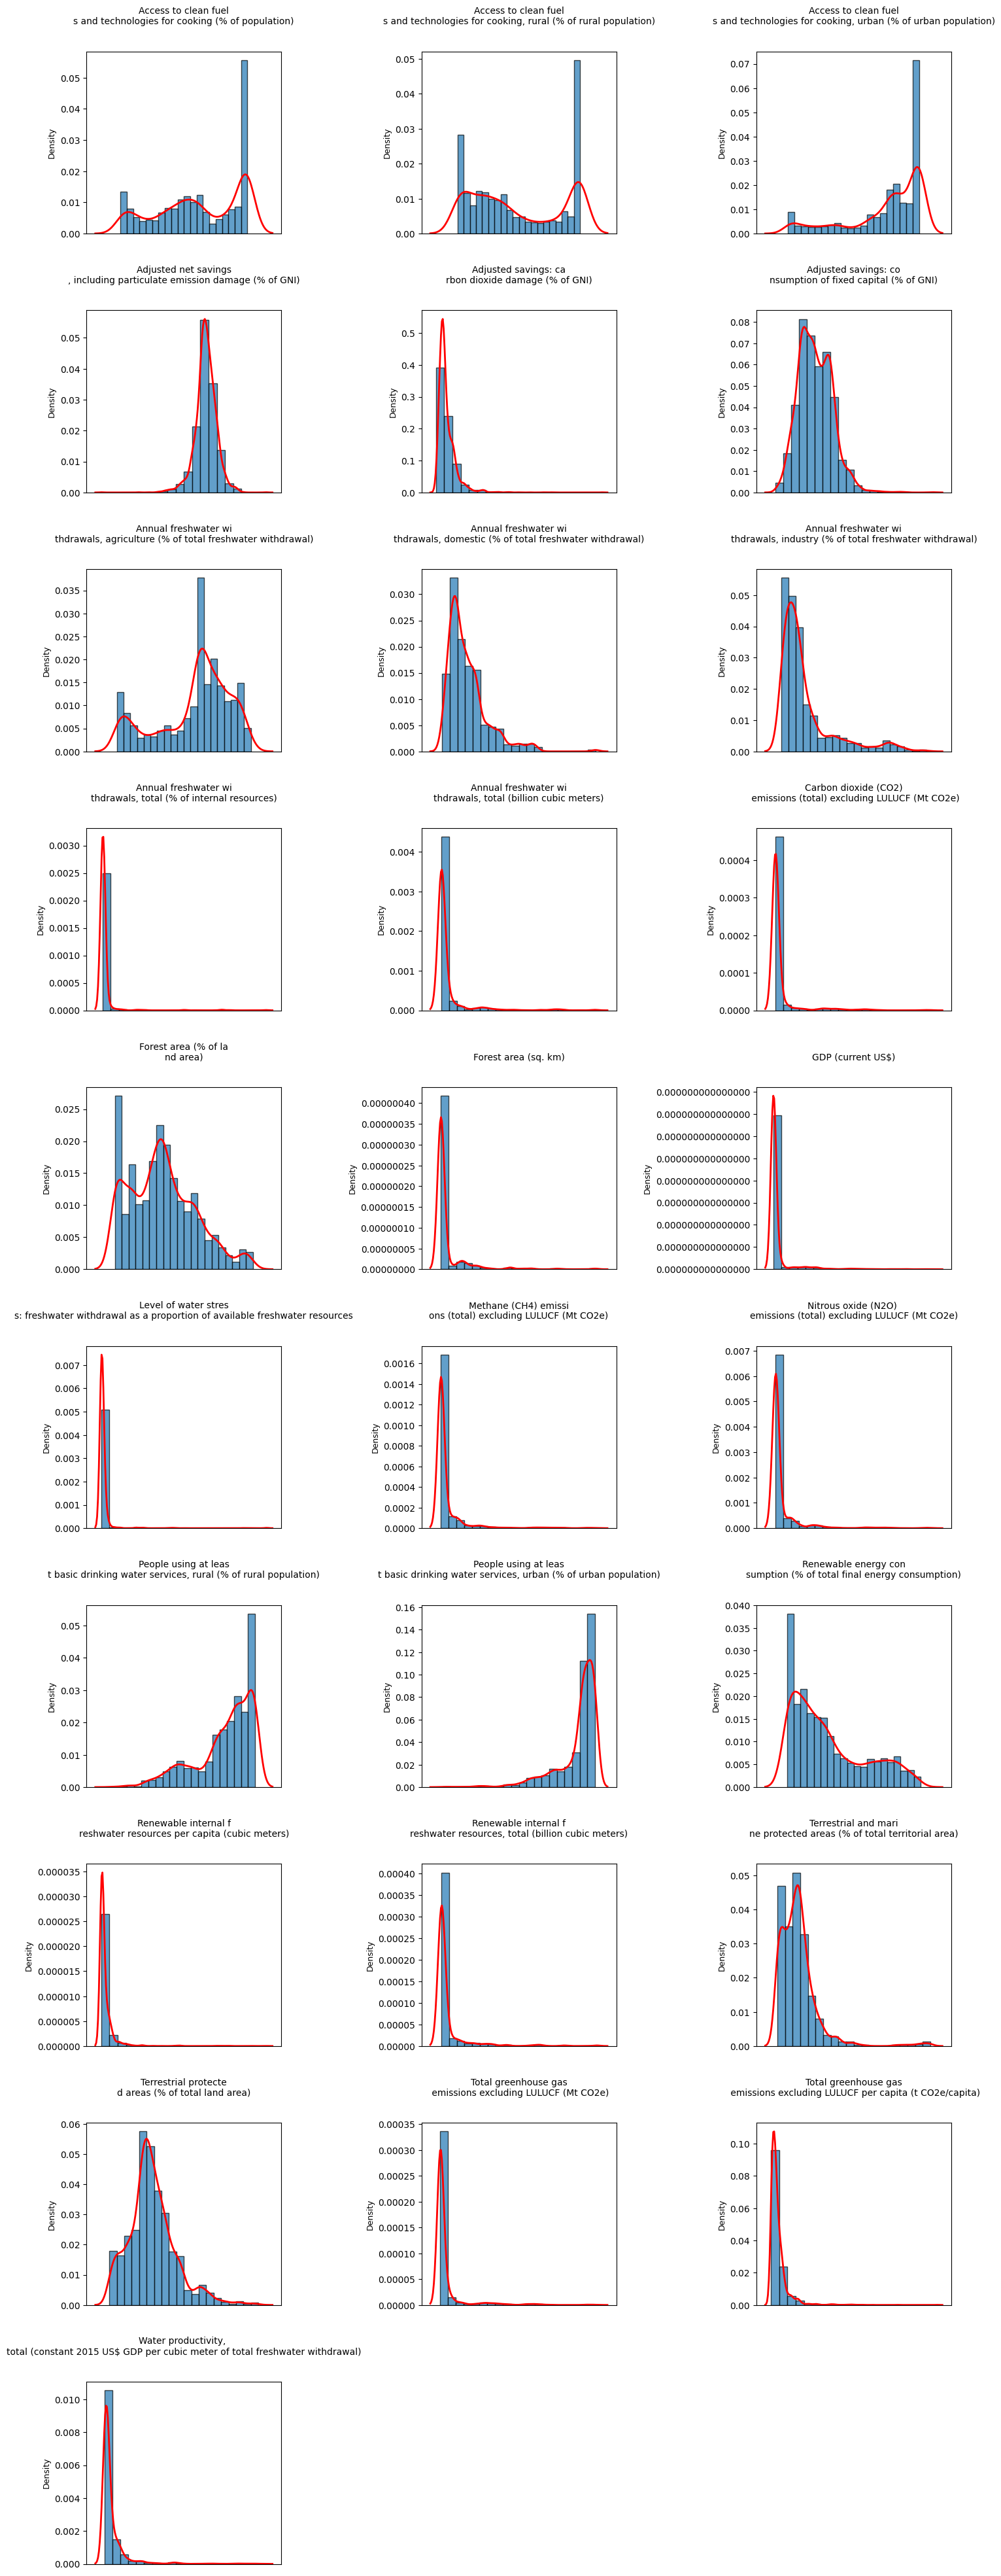

In [28]:
df_numeric = df.drop(columns=['Country Name', 'Country Code', 'Year'])

numeric_cols = df_numeric.columns
num_cols = len(numeric_cols)
rows = (num_cols // 3) + (num_cols % 3 > 0)  

plt.figure(figsize=(15, rows * 4))
for i, col in enumerate(numeric_cols):
    plt.subplot(rows, 3, i + 1)
    plt.hist(df_numeric[col], bins=20, edgecolor='black', alpha=0.7, density=True)
    sns.kdeplot(df_numeric[col], color='red', linewidth=2)
    
    if len(col) > 20:
        col_title = col[:20] + '\n' + col[20:]  
    else:
        col_title = col
        
    plt.title(col_title, fontsize=10, pad=10, y=1.1)
    plt.ylabel('Density', fontsize=9)
    plt.xlabel('')
    plt.xticks([])  
    plt.ticklabel_format(axis='y', style='plain')  
    
plt.tight_layout(pad=3.0)
plt.show()

Most of the columns are heavily skewed.

### 2.2. Visualization objectives

There are 2 members in our team, so we decide to derive 6 objectives:

#### 1. How gases emission ($CO_2$, $N_2O$ and $CH_4$) affects the greenhouse effect?

**Benefits**
- Helps climate researchers understand the causes of climate change, which is crucial for developing effective mitigation strategies.
- Supports industries and businesses in understanding their impact and adopting cleaner technologies.

**Features used in data**

- `Year`
- `Carbon dioxide (CO2) emissions (total) excluding LULUCF (Mt CO2e)`
- `Methane (CH4) emissions (total) excluding LULUCF (Mt CO2e)`
- `Nitrous oxide (N2O) emissions (total) excluding LULUCF (Mt CO2e)`
- `Total greenhouse gas emissions excluding LULUCF (Mt CO2e)`

#### 2. Which regions or continents contribute the most to global GHG emissions in 2023?

**Benefits**
- Assists international organizations in prioritizing emission reduction policies and global climate agreements.
- Helps researchers analyze trends in emissions and develop regional strategies for sustainable development.

**Features used in data**

- `Total greenhouse gas emissions excluding LULUCF (Mt CO2e)`
- `Country Name`
- `Country Code`
- `GDP (current US$)`
- `Renewable energy consumption (% of total final energy consumption)`

#### 3. What is the status of deforestation over years around the world?

**Benefits**
- Supports conservation efforts by identifying areas at high risk of forest loss.
- Helps governments and NGOs measure the impact of deforestation on climate change, biodiversity, and local communities.

**Features used in data**  
- `Forest area (% of land area)`
- `Forest area (sq. km)`
- `Year`
- `Country Name`
- `Country Code`

#### 4. How are environmental protection policies implemented in Southeast Asian countries, and what impact do they have on the greenhouse effect in these nations?

**Benefits**
- Allows governments to learn from successful environmental policies and implement similar measures.
- Helps investors and businesses identify regions with strong sustainability practices for eco-friendly investments.

**Features used in data**
- `Access to clean fuels and technologies for cooking (% of population)`
- `Renewable energy consumption (% of total final energy consumption)`
- `Total greenhouse gas emissions excluding LULUCF (Mt CO2e)`
- `Year`
- `Country Name`

#### 5. Based on greenhouse gas emissions in Southeast Asia from the previous section, how are these countries impacted by emission-related damage?

**Benefits**
- Helps economists assess the financial burden of climate change on different economies.
- Encourages businesses and policymakers to invest in green technologies to minimize long-term costs.

**Features used in data**
- `Adjusted savings: carbon dioxide damage (% of GNI)`
- `Year`
- `Country Name`

#### 6. What is the status of water supply among income groups (Freshwater used on daily basis, level of water stress)?

**Benefits**
- Helps governments and water management authorities develop better water distribution and conservation plans.
- Supports humanitarian efforts to ensure access to clean water in water-stressed regions.
- Analyze the amount of freshwater is used on daily basis.

**Features used in data**
- `Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)`
- `Annual freshwater withdrawals, domestic (% of total freshwater withdrawal)`
- `Annual freshwater withdrawals, industry (% of total freshwater withdrawal)`
- `Annual freshwater withdrawals, total (% of internal resources)`
- `Annual freshwater withdrawals, total (billion cubic meters)`
- `Renewable internal freshwater resources per capita (cubic meters)`
- `Renewable internal freshwater resources, total (billion cubic meters)`
- `Year`
- `Country Name`

### 2.3. Analyzing objectives

#### 1. How gases emission ($CO_2$, $N_2O$ and $CH_4$) affects the greenhouse effect?

First, we extract gases emission and total greenhouse gas emissions column

In [29]:
cols = [
    'Carbon dioxide (CO2) emissions (total) excluding LULUCF (Mt CO2e)',
    'Methane (CH4) emissions (total) excluding LULUCF (Mt CO2e)',
    'Nitrous oxide (N2O) emissions (total) excluding LULUCF (Mt CO2e)',
    'Total greenhouse gas emissions excluding LULUCF (Mt CO2e)'
]

We filter the data with ```Country Name``` is world to analyze greenhouse effect of the world.

In [30]:
df_filtered = df[df['Country Name'] == 'World'][['Year'] + cols].copy()
df_filtered.columns = ['Year', 'CO2', 'CH4', 'N2O', 'Total Emissions']
df_filtered = df_filtered.sort_values('Year')

There are still other gas types, so we calculate by substract ```Total Emissions``` with sum of the emissions of the gas types that we currently have.

In [31]:
df_filtered['Other Gases'] = df_filtered['Total Emissions'] - (df_filtered['CO2'] + df_filtered['CH4'] + df_filtered['N2O'])

We plot the quantity of Total emissions and emissions of different types of gases throughout the year using area chart.

**Reason:** To show the trend over time, highlight contribution of different gases and helps understand the total emissions while breaking it down by gas type.

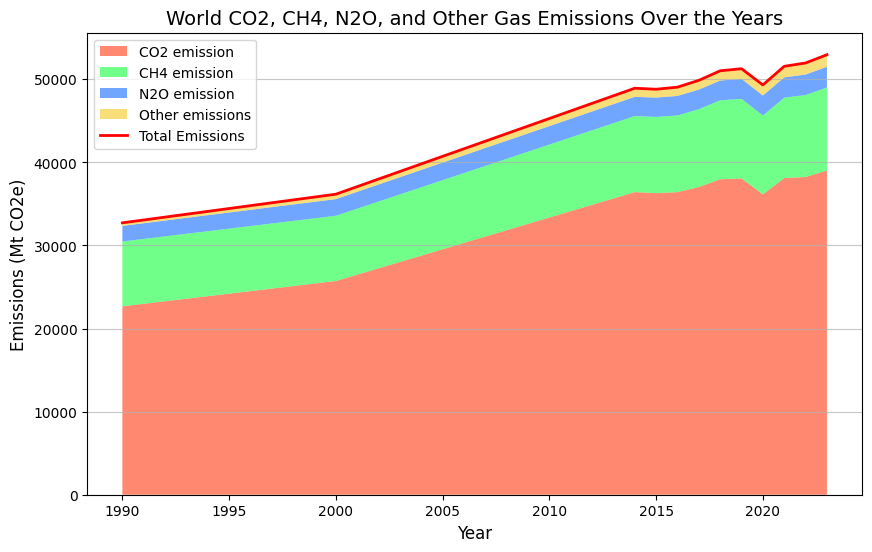

In [32]:
colors = ['#FF5733', '#33FF57', '#3380FF', '#F4D03F'] 
plt.figure(figsize=(10, 6))
plt.stackplot(df_filtered['Year'], df_filtered['CO2'], df_filtered['CH4'], df_filtered['N2O'], df_filtered['Other Gases'],
              labels=['CO2 emission', 'CH4 emission', 'N2O emission', 'Other emissions'], colors=colors, alpha=0.7)

plt.plot(df_filtered['Year'], df_filtered['Total Emissions'], label='Total Emissions', color='red', linewidth=2, linestyle='-')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Emissions (Mt CO2e)', fontsize=12)
plt.title('World CO2, CH4, N2O, and Other Gas Emissions Over the Years', fontsize=14)
plt.legend(loc='upper left')
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.show()

From the area chart, we can clearly see that ```Total Emissions``` and the gas types rise from 1990 to 2023. ```CO2 emissions``` takes the highest proportion throughout the years. All the emissions seem to have the same trend. 

Additionally, the world faces the presence of the other emissions types.

##### Conclusion

The continuous increase in CO2 levels suggests that human activities, such as fossil fuel combustion, industrial expansion, and deforestation, remain major contributors to climate change.

Furthermore, the presence of ```Other Emissions``` highlights additional greenhouse gases that also contribute to climate change. While they make up a smallest portion of total emissions, their long-term effects should not be overlooked.

#### 2. Which regions or continents contribute the most to global GHG emissions in 2023?

We want to visualize this on a world map, so our strategy is to load a shapefile containing world country boundaries into a ```GeoDataFrame``` using the ```geopandas (gpd)```, and rename the column in it to match with our original data.

**Note:** Link of the shapefile data: https://www.naturalearthdata.com/downloads/110m-cultural-vectors/ . We download the data in ```Admin 0 - Countries``` section.

In [33]:
shapefile_path = "./data/geo_data/ne_110m_admin_0_countries.shp"
world = gpd.read_file(shapefile_path)
world = world.rename(columns={"ADM0_A3": "Country Code"})

Filer the data in 2023

In [34]:
df_2023 = df[df['Year'] == 2023]
merged = world.merge(df_2023, on="Country Code", how="left")

We plot the Global greenhouse gas emissions in 2023 using world heatmap.

**Reason:** There are a lot of countries, we cannot just visualize them on normal chart since it is hard to make further analysis on a plot that has many different elements. To identify the high emissions area and visualize global emissions distribution.

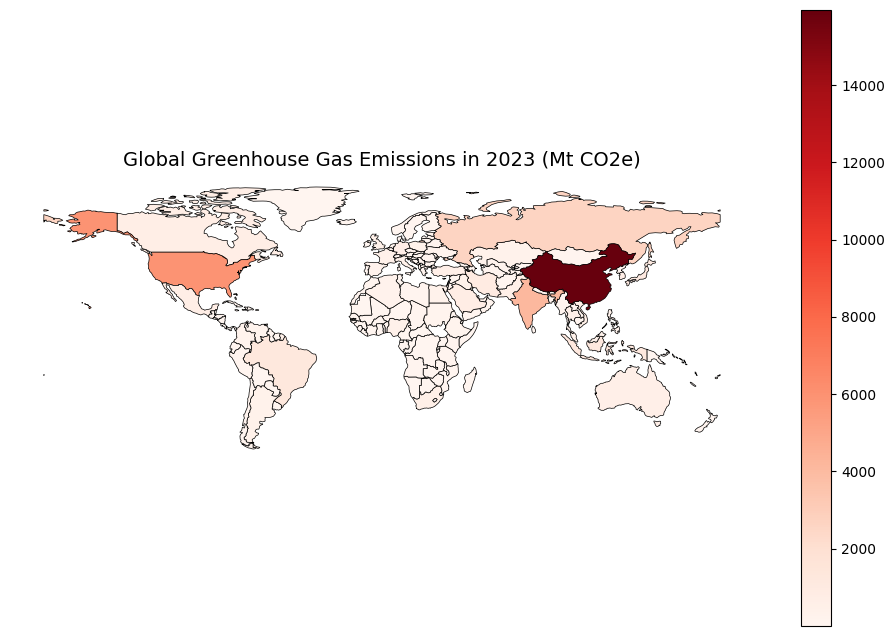

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged.plot(
    column="Total greenhouse gas emissions excluding LULUCF (Mt CO2e)",
    cmap="Reds",
    linewidth=0.5,
    edgecolor="black",
    legend=True,
    ax=ax
)

ax.set_title("Global Greenhouse Gas Emissions in 2023 (Mt CO2e)", fontsize=14)
ax.axis("off")
plt.show()

From the world heatmap, we can clearly observe that ```China```, ```United States``` and ```India``` have the highest emissions. This is consistent with historical data and global reports, which indicate that these countries are the largest contributors.

But ```China``` seems to have highest greenhouse gas emissions.

So we make further analysis by diving into ```China``` to find out the key factors leading to this.

In [36]:
china_data = df[df['Country Name'] == 'China'].copy()

Thinking about it, we all know that ```China``` is a country with high-level economy, with fast ```GDP``` growth. So we will analyze if this is true so that can understand how it contributes to its emissions.

We plot line graph to show the GDP growth of ```China```.

**Reason:** To show the trend of GDP over time.

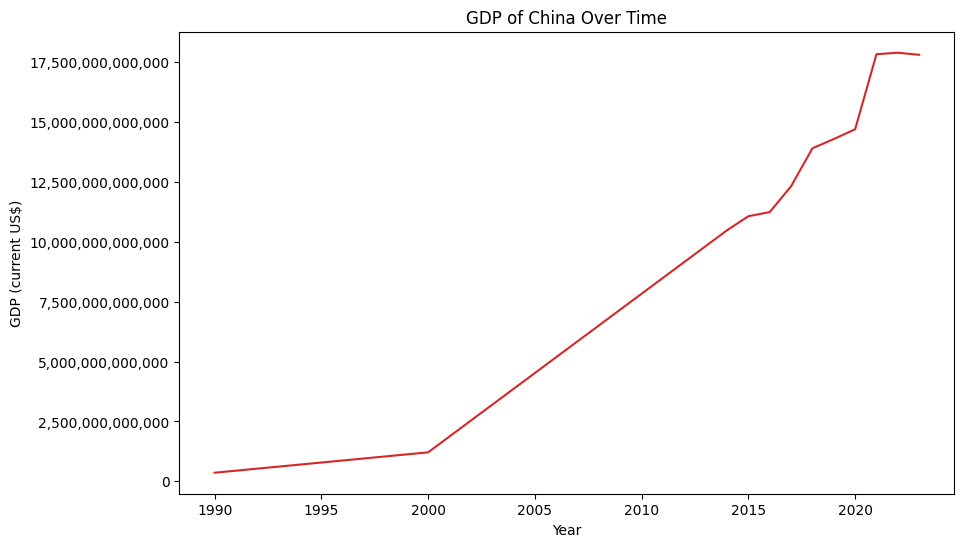

In [37]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(china_data['Year'], china_data['GDP (current US$)'], color='tab:red', label='GDP')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP (current US$)')
ax1.set_title('GDP of China Over Time')
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))  
plt.show()

So it is the fact that ```China``` has fast ```GDP growth```. It mostly rises significantly over time. Due to its growing economy, it may have high emissions by the presence of industrialization, urbanization, and increased energy consumption.

Another factor should be taken into consideration is ```China```'s renewable energy consumption. If it has highest emissions, maybe the policies of protecting environment and preserving energy is lack of effectiveness.

We plot line graph to show the Renewable Energy Consumption of ```China```.

**Reason:** To show the trend of Renewable Energy Consumption over time.

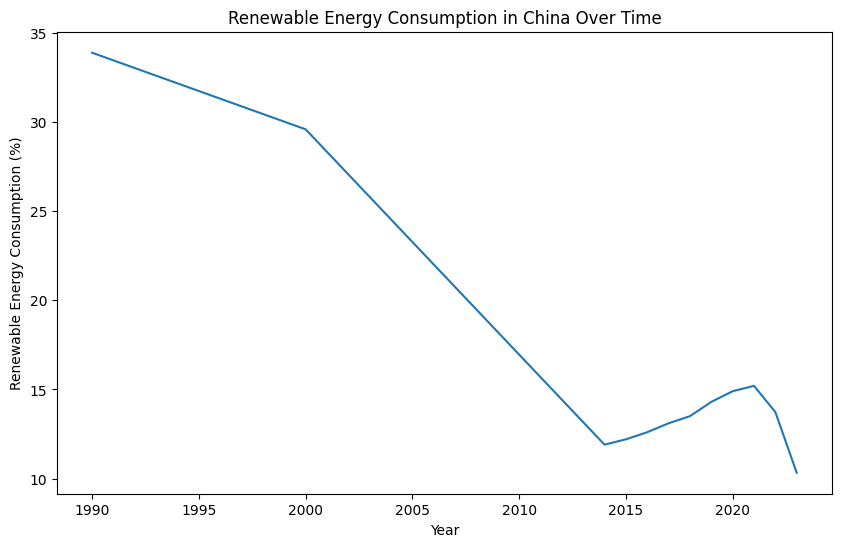

In [38]:
fig, ax2 = plt.subplots(figsize=(10, 6))
ax2.plot(china_data['Year'], china_data['Renewable energy consumption (% of total final energy consumption)'], 
         color='tab:blue', label='Renewable Energy Consumption')
ax2.set_xlabel('Year')
ax2.set_ylabel('Renewable Energy Consumption (%)')
ax2.set_title('Renewable Energy Consumption in China Over Time')
plt.show()

So it is true that ```Renewable energy consumption``` of ```China``` reduces over time. This decline may be contributed to ```China```'s dependence on fossil fuels, particularly coal, which remains a primary energy source for its industrial and economic growth.

##### Conclusion

The high-ranked economy countries (especially ```China```) are likely to contribute high greenhouse gas emissions. As their economies grow, they use more energy for industry, transportation, and urban development, leading to more pollution.

China’s rapid GDP growth has increased its energy demand, relying heavily on coal and fossil fuels. Although the country invests in renewable energy, it may not be enough to keep up with overall energy consumption.

To reduce emissions, high-emission countries need to focus on clean energy, better efficiency, and stronger environmental policies for a more sustainable future.

#### 3. What is the status of deforestation over years around the world?

We extract the world data.

In [39]:
wdl_data = df[df["Country Name"] == "World"]

We plot forest area over time of the world by line graph.

**Reason:** To show the Forest area over time.

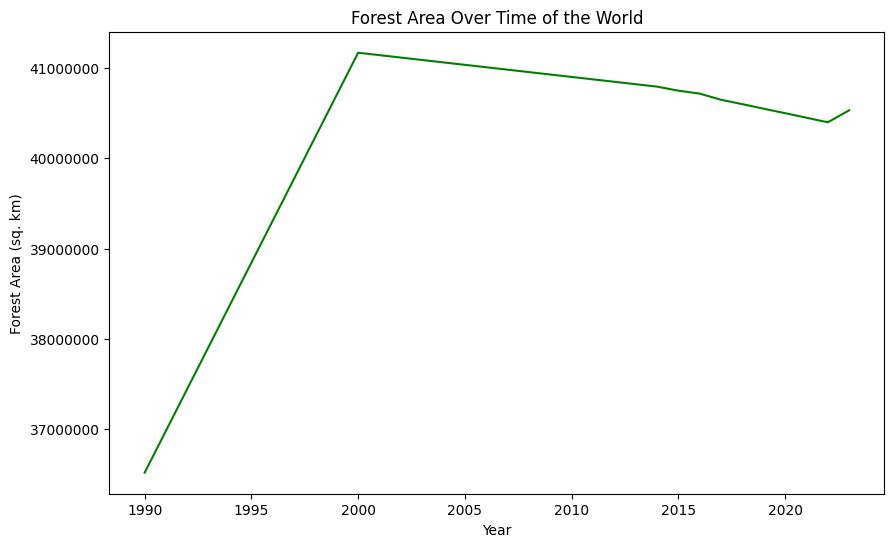

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(wdl_data["Year"], wdl_data["Forest area (sq. km)"], linestyle='-', color='green')
plt.xlabel("Year")
plt.ylabel("Forest Area (sq. km)")
plt.title("Forest Area Over Time of the World")
plt.ticklabel_format(style='plain', axis='y') 
plt.show()

As can be seen from the line graph, ```Forest Area``` rises from 1990 to 2000, then experiences a decline until after 2020. The decline in ```Forest Area``` indicates that deforestation occurs in that period.

The peak of the line graph is at 2000, and the nearest year of the data is 2023, so we compare the ```Forest Area (% of Land Area)``` of the world in these 2 years.

We compare Global Forest Area in 2000 with 2023 by using world heat map to visualize.

**Reason:** World heatmap helps to highlight the percentage that forest area cover all over the world, also show where deforestation occurs the most. 

Plot Global Forest Area in 2000.

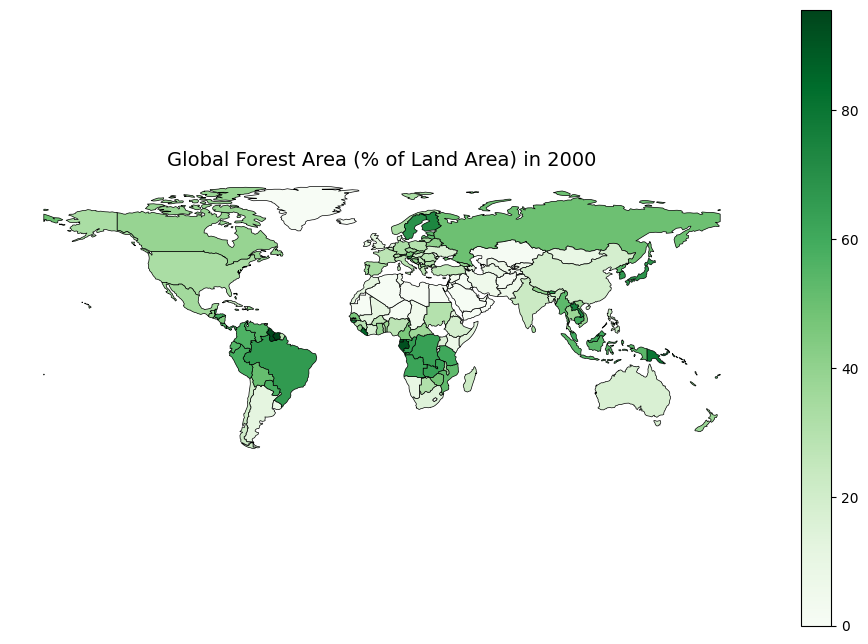

In [41]:
df_2000 = df[df['Year'] == 2000]
merged = world.merge(df_2000, on="Country Code", how="left")

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged.plot(
    column="Forest area (% of land area)",  
    cmap="Greens",  
    linewidth=0.5,
    edgecolor="black",
    legend=True,
    ax=ax
)

ax.set_title("Global Forest Area (% of Land Area) in 2000", fontsize=14)
ax.axis("off")
plt.show()

Plot Global Forest Area in 2023.

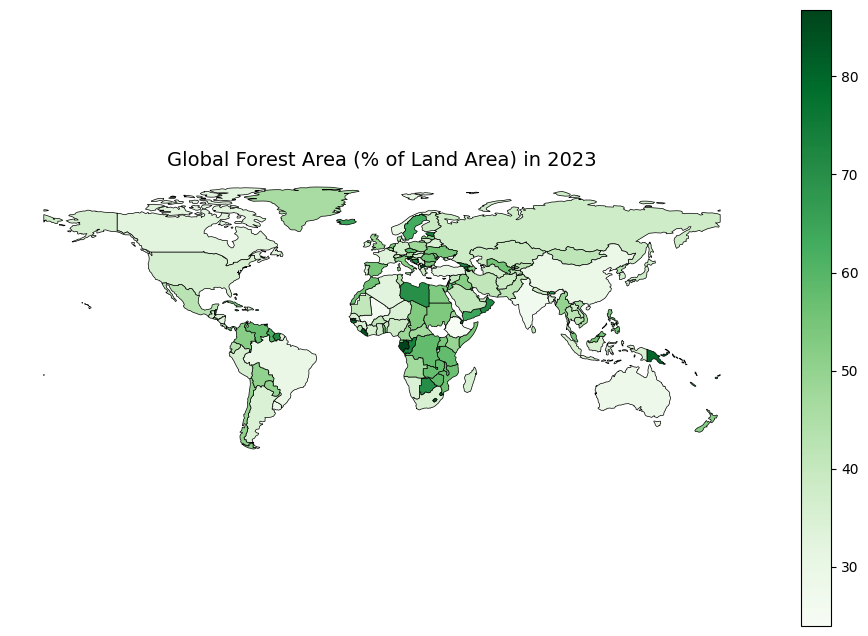

In [42]:
df_2023 = df[df['Year'] == 2023]
merged = world.merge(df_2023, on="Country Code", how="left")

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged.plot(
    column="Forest area (% of land area)",  
    cmap="Greens",  
    linewidth=0.5,
    edgecolor="black",
    legend=True,
    ax=ax
)

ax.set_title("Global Forest Area (% of Land Area) in 2023", fontsize=14)
ax.axis("off")
plt.show()

It is clear that world has experienced a huge reduction of forest area for the past 23 years. Deforestation mostly occurs in the large countries. This can be due to their population growth, industrialization and the need of the land space and forest based material.

However, some specific regions or countries still have risen area of forest, especially those in North Africa. This growth can be due to reforestation efforts, afforestation projects, or improved conservation policies.

To make further exploration, we identify and analyze the top 10 countries that have highest forest loss rate over years. This can help to indicate if there are some specific regions that has high proportion of deforestation.

We extract necessary columns, calculate the rate of deforestation change over years. Then, we calculate each country's mean of that rate and identify the top 10 countries by average deforestation rate.

1. **Forest Loss Rate (%)**:

   $$
   \text{Forest Loss Rate} (\%) = \left( \frac{\text{Forest Area}_{\text{previous year}} - \text{Forest Area}_{\text{current year}}}{\text{Forest Area}_{\text{previous year}}} \right) \times 100
   $$

2. **Average Deforestation Rate (%)**:

   $$
   \text{Avg Deforestation Rate} (\%) = \frac{\sum \text{Forest Loss Rate (\%)} }{\text{Number of years}}
   $$

In [43]:
df_forest = df[["Country Name", "Year", "Forest area (sq. km)"]].copy()
df_forest.sort_values(by=["Country Name", "Year"], inplace=True)
df_forest["Forest Loss Rate (%)"] = df_forest.groupby("Country Name")["Forest area (sq. km)"].pct_change() * -100
avg_deforestation_rate = df_forest.groupby("Country Name")["Forest Loss Rate (%)"].mean()
top_10_countries = avg_deforestation_rate.sort_values(ascending=False).head(10)

Plot the top 10 countries' Forest Loss Rate by horizontal bar charts.

**Reason:** To make comparison clearer between 10 countries, effectively rank 10 countries.

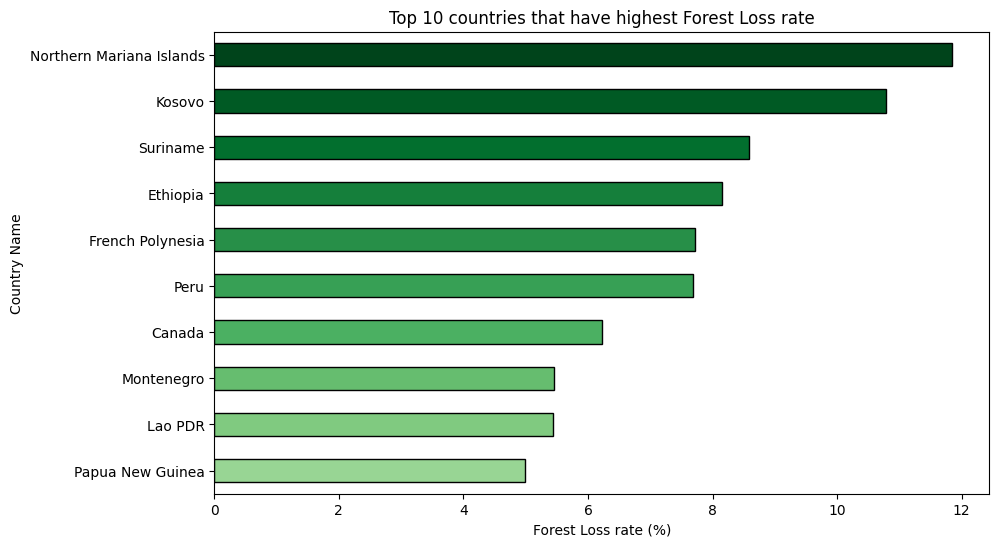

In [44]:
plt.figure(figsize=(10, 6))
top_10_countries = top_10_countries.sort_values(ascending=False)
colors = plt.cm.Greens(np.linspace(1, 0.4, len(top_10_countries)))
top_10_countries.plot(kind="barh", color=colors, edgecolor="black")
plt.xlabel("Forest Loss rate (%)")
plt.ylabel("Country Name")
plt.title("Top 10 countries that have highest Forest Loss rate")
plt.gca().invert_yaxis() 
plt.show()

From the chart we can see that ```Ethiopia``` has the highest deforestation rate, while ```Bolivia``` is the lowest. 

When tracking down these countries, we can see that deforestation occurs all over the world. This shows that deforestation is a global issue, affecting multiple continents, especially ```South America```, ```Africa```, and ```Asia```.

##### Conclusion

Deforestation has been a major global issue over the past 23 years, with a significant decline in forest area since 2000.

While large countries face deforestation due to population growth and industrialization, some regions, like ```North Africa```, have seen forest recovery through conservation efforts. ```Ethiopia``` has the highest deforestation rate, while ```Bolivia``` has the lowest. This highlights the widespread impact of deforestation, particularly in ```South America```, ```Africa```, and ```Asia```.

Without immediate action, continued deforestation could lead to severe environmental consequences, including biodiversity loss, climate change, and disrupted ecosystems.

#### 4. How are environmental protection policies implemented in Southeast Asian countries, and what impact do they have on the greenhouse effect in these nations?

In this section we will use **twin plot** including stack bar chart for `Access to clean fuels and technologies for cooking (% of population)` and `Renewable energy consumption (% of total final energy consumption)`, the second chart is line chart to show `Total greenhouse gas emissions excluding LULUCF (Mt CO2e`

**Reason**: The stacked bar chart is an effective way to display two different characteristics within the same figure, making it easier to compare them. Additionally, combining a line chart with a bar chart helps visualize the relationship between features more clearly.

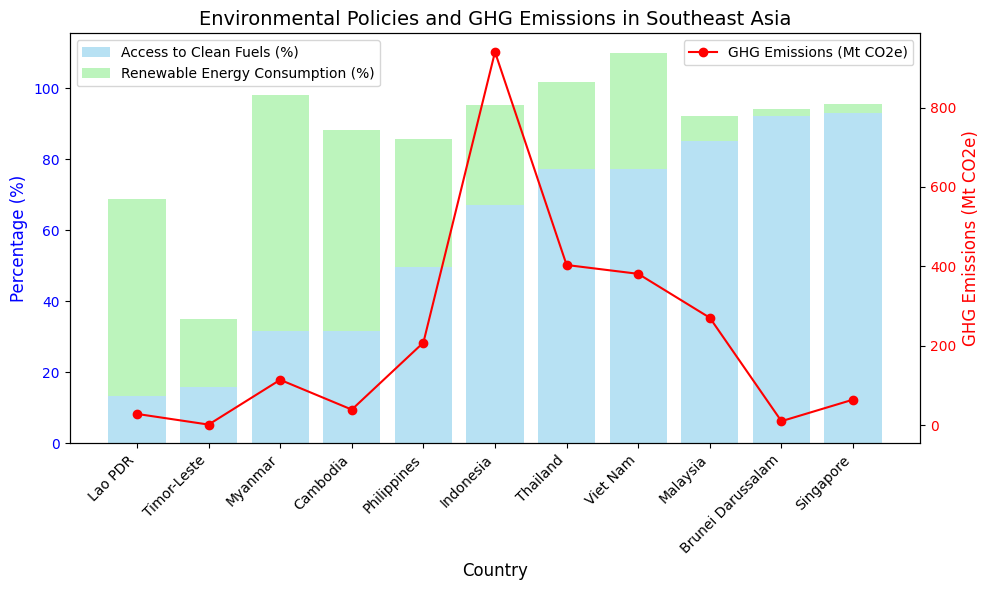

In [45]:
asean_countries = ["BRN", "KHM", "IDN", "LAO", "MYS", "MMR", "PHL", "SGP", "THA", "VNM", "TLS"]

asean_map = world[world["Country Code"].isin(asean_countries)]

df_asean = df[df["Country Code"].isin(asean_countries)]

df_asean_avg = df_asean.groupby('Country Name').agg({
    'Access to clean fuels and technologies for cooking (% of population)': 'mean',
    'Renewable energy consumption (% of total final energy consumption)': 'mean',
    'Total greenhouse gas emissions excluding LULUCF (Mt CO2e)': 'mean'
}).sort_values(by='Access to clean fuels and technologies for cooking (% of population)', ascending=True)

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(df_asean_avg.index, df_asean_avg['Access to clean fuels and technologies for cooking (% of population)'], 
        color='skyblue', alpha=0.6, label='Access to Clean Fuels (%)')
ax1.bar(df_asean_avg.index, df_asean_avg['Renewable energy consumption (% of total final energy consumption)'], 
        color='lightgreen', alpha=0.6, label='Renewable Energy Consumption (%)', 
        bottom=df_asean_avg['Access to clean fuels and technologies for cooking (% of population)'])
ax1.set_xlabel('Country', fontsize=12)
ax1.set_ylabel('Percentage (%)', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

ax1.set_xticks(range(len(df_asean_avg.index)))
ax1.set_xticklabels(df_asean_avg.index, rotation=45, ha='right')

ax2 = ax1.twinx()
ax2.plot(df_asean_avg.index, df_asean_avg['Total greenhouse gas emissions excluding LULUCF (Mt CO2e)'], 
         color='red', marker='o', label='GHG Emissions (Mt CO2e)')
ax2.set_ylabel('GHG Emissions (Mt CO2e)', fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')

plt.title('Environmental Policies and GHG Emissions in Southeast Asia', fontsize=14)
plt.tight_layout()
plt.show()

This twin plot compares environmental policies (Access to Clean Fuels, Renewable Energy Consumption) and GHG Emissions in Southeast Asia (2021-2023). 

Malaysia, Brunei Darussalam, and Singapore have high access to clean fuels (nearly 100%), while the Philippines, Cambodia, and Lao PDR lead in renewable energy consumption (50-70%). 

Indonesia has the highest emissions (800 Mt CO2e), whereas Brunei has the lowest.

##### Conclusion
As we can see, `Access to Clean Fuels and Technologies for Cooking` and `Renewable Energy Consumption` do not directly determine `greenhouse gas emissions`. For instance, countries like Singapore and Brunei, which have the highest access to clean fuels and technology, exhibit low greenhouse gas emissions. In contrast, Indonesia, despite using a significant amount of clean fuels and technology, still has emissions exceeding 800 Mt CO2e. This suggests that greenhouse gas emissions are influenced by multiple factors beyond just clean energy access and using renewable resources.

#### 5. Based on greenhouse gas emissions in Southeast Asia from the previous section, how are these countries impacted by emission-related damage?

We have been analyzed the amount of greenhouse gas emission in the previous section. Now in this section, let's see how Southeast Asian countries incur the cost due to emission-related damage.

First, let's have a quick look on carbon dioxide damage in this area over years. We will use interactive world map to plot the data.

**Reason**: World map lets us have an overall insight from a specific area.

In [46]:
shapefile_path = "./data/geo_data/ne_110m_admin_0_countries.shp"
world = gpd.read_file(shapefile_path)
world = world.rename(columns={"ADM0_A3": "Country Code"})

merged = asean_map.merge(df_asean, on="Country Code", how="left")

asean_geojson = asean_map.__geo_interface__

fig = px.choropleth(
    merged, 
    geojson=asean_geojson,
    locations="Country Code", 
    featureidkey="properties.Country Code",
    color="Adjusted savings: carbon dioxide damage (% of GNI)",
    animation_frame="Year",
    color_continuous_scale="Reds",
    title="CO2 Damage (% of GNI) in Southeast Asia Over the Years",
    labels={"Adjusted savings: carbon dioxide damage (% of GNI)": "CO2 Damage (% GNI)"},
)

fig.update_layout(
    width=1000, 
    height=700, 
    margin={"r":0, "t":50, "l":0, "b":0},  
    title_x=0.5  
)

fig.update_geos(fitbounds="locations", visible=False)
fig.show()


As we can see, the damage of each region fluctuated over years. To get general insight, we calculate the average damage that each country takes using bar chart.

**Reason**: Bar chart is effective to compare average CO2 Damage between regions.

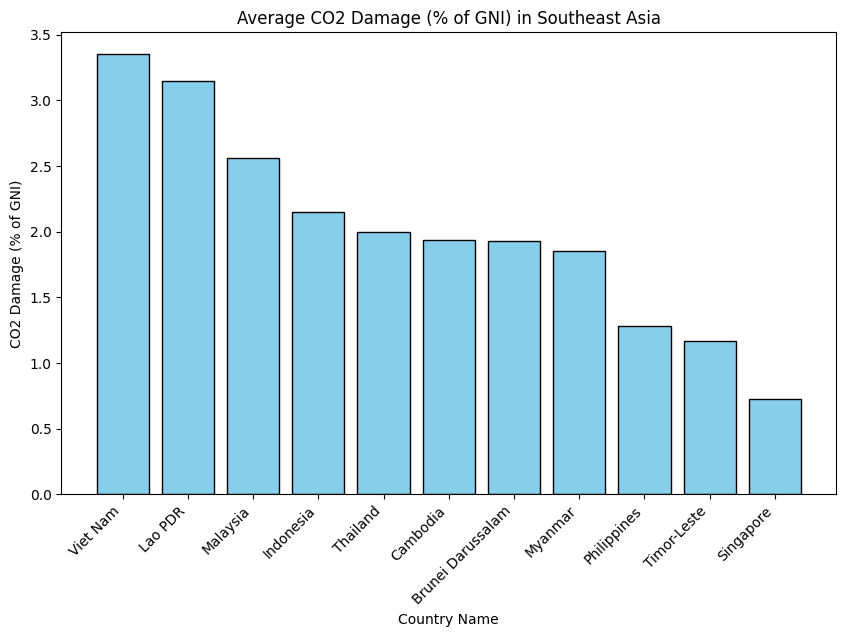

In [47]:
df_damage = df_asean.groupby('Country Name')['Adjusted savings: carbon dioxide damage (% of GNI)'].mean().sort_values(ascending=False)

figure = plt.figure(figsize=(10, 6))
plt.bar(df_damage.index, df_damage, color='skyblue', edgecolor='black')
plt.xlabel('Country Name')
plt.xticks(rotation=45, ha='right')
plt.ylabel('CO2 Damage (% of GNI)')
plt.title('Average CO2 Damage (% of GNI) in Southeast Asia')
plt.show()

##### Conclusion

Countries with high GHG emissions tend to suffer greater CO₂ damage. Indonesia, with the highest emissions (around 900 Mt CO₂e), experiences CO₂ damage of 2.5% GNI, while Vietnam (400 Mt CO₂e) faces the highest damage at 3.5% GNI due to its lower economic output. 

In contrast, Singapore, with the lowest emissions (50 Mt CO₂e), has CO₂ damage of only 0.5% GNI, thanks to effective environmental management. Lao PDR (100 Mt CO₂e) exhibits high CO₂ damage (3.2% GNI) despite relatively lower emissions, highlighting the disproportionate economic impact on smaller economies. CO₂ damage in Southeast Asia reflects the interplay between GHG emissions and economic structure, with highly industrialized nations like Indonesia and Vietnam bearing greater losses.

#### 6. What is the status of water supply among income groups (Freshwater used on daily basis, level of water stress)?

First, let's analyze the overall water status:

**How do different income groups differ in terms of water stress levels, the proportion of water withdrawals for domestic use, access to safe water in rural and urban areas, and water productivity?**

To answer this question, we will use **radar chart** to show the overall water status in different income classes.

**Reason**: Radar chart is the best option for displaying multiple characteristics and compare features among groups.

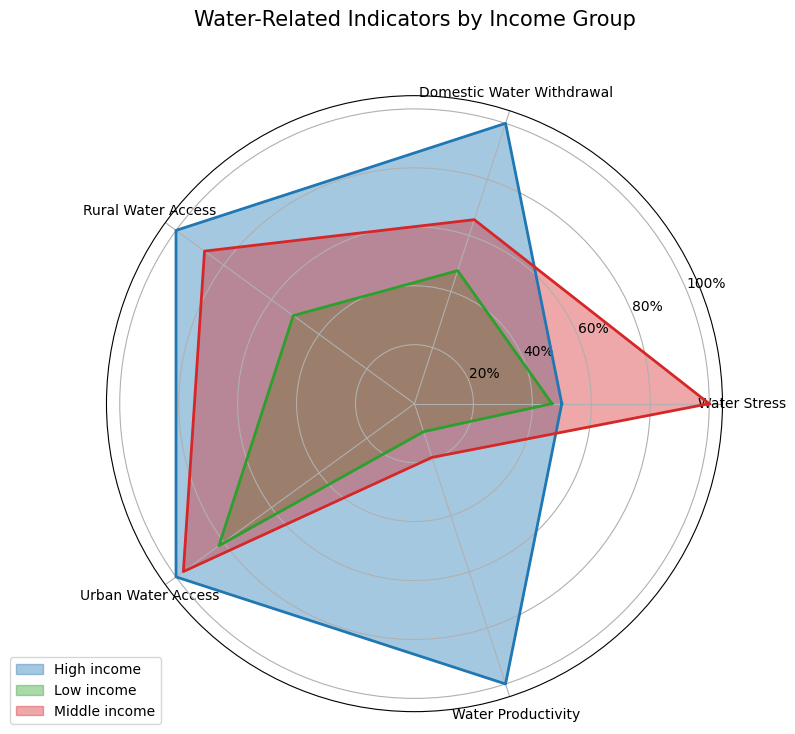

In [48]:
income_groups = ['High income', 'Low income', 'Middle income']
df_filtered = df[df['Country Name'].isin(income_groups)]

df_grouped = df_filtered.groupby('Country Name').agg({
    'Level of water stress: freshwater withdrawal as a proportion of available freshwater resources': 'mean',
    'Annual freshwater withdrawals, domestic (% of total freshwater withdrawal)': 'mean',
    'People using at least basic drinking water services, rural (% of rural population)': 'mean',
    'People using at least basic drinking water services, urban (% of urban population)': 'mean',
    'Water productivity, total (constant 2015 US$ GDP per cubic meter of total freshwater withdrawal)': 'mean'
}).reset_index()

df_grouped.set_index('Country Name', inplace=True)

df_normalized = df_grouped.copy()
for col in df_grouped.columns:
    max_val = df_grouped[col].max()
    df_normalized[col] = df_grouped[col] / max_val
    df_normalized[col] = df_normalized[col].apply(lambda x: max(x, 0.1))

categories = ['Water Stress', 'Domestic Water Withdrawal', 'Rural Water Access', 'Urban Water Access', 'Water Productivity']
N = len(categories)

income_groups = ['High income', 'Low income', 'Middle income']
values = []
for income_group in income_groups:
    row = df_normalized.loc[income_group].values
    values.append(np.concatenate((row, [row[0]])))

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

colors = ['#1f77b4', '#2ca02c', '#d62728']
for i, (income_group, value) in enumerate(zip(income_groups, values)):
    ax.fill(angles, value, color=colors[i], alpha=0.4, label=income_group)
    ax.plot(angles, value, color=colors[i], linewidth=2)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=10)

ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticklabels(['20%', '40%', '60%', '80%', '100%'])

plt.title('Water-Related Indicators by Income Group', size=15, color='black', y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()

The Radar Chart clearly illustrates the stark differences in water resource management among three income groups. 
High-income countries excel with the highest Water Productivity (100%) and nearly perfect access to clean water, thanks to advanced technology and well-developed infrastructure.

In contrast, middle-income countries face the highest Water Stress (100%) but have low Water Productivity (20%), highlighting the need for more efficient water use. 

Meanwhile, low-income countries lag behind in all indicators, especially Water Productivity (10%) and access to clean water (only 50% in rural areas), primarily due to limited resources and inadequate infrastructure.

Next, let's see **What was the allocation rate of freshwater for agriculture, domestic use, and industry for each income group in the most recent year?**

We use donut chart in this subsection

**Reason**: It is easy to visualize the differences in the proportions of freshwater withdrawals among income groups.

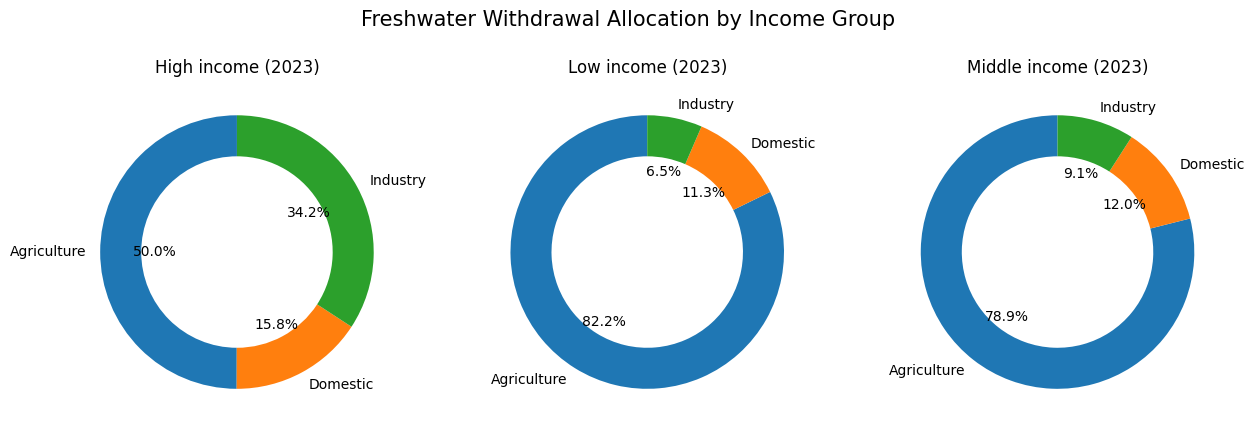

In [49]:
latest_year = df_filtered['Year'].max()
df_latest = df_filtered[df_filtered['Year'] == latest_year]

# Tính trung bình tỷ lệ phân bổ nước cho từng nhóm
df_grouped = df_latest.groupby('Country Name').agg({
    'Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)': 'mean',
    'Annual freshwater withdrawals, domestic (% of total freshwater withdrawal)': 'mean',
    'Annual freshwater withdrawals, industry (% of total freshwater withdrawal)': 'mean'
}).reset_index()

# Vẽ Donut Chart cho từng nhóm thu nhập
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, income_group in enumerate(income_groups):
    subset = df_grouped[df_grouped['Country Name'] == income_group]
    sizes = [subset['Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)'].iloc[0],
             subset['Annual freshwater withdrawals, domestic (% of total freshwater withdrawal)'].iloc[0],
             subset['Annual freshwater withdrawals, industry (% of total freshwater withdrawal)'].iloc[0]]
    labels = ['Agriculture', 'Domestic', 'Industry']
    axes[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
    axes[i].set_title(f'{income_group} ({latest_year})')

plt.suptitle('Freshwater Withdrawal Allocation by Income Group', size=15)
plt.show()


The following donut charts infer that agriculture is the sector with the highest freshwater withdraw among 3 groups of income. 

Specifically, **low income** group allocate the highest amount of freshwater consumption for Agriculture since the low-income countries tend to depend on agriculture. The ratio of freshwater for domestic use higher than that of industry. 

**Middle-income** group takes after the trend of low income, but with the smaller proportion of freshwater allocation and higher rate in industry.

**High-income** group are likely to invest more freshwater for industry than domestic use than the others.

##### Conclusion
The water situation highlights clear inequality: **High-income** countries manage water efficiently with a balanced allocation, **middle-income** countries face significant resource pressure, while **low-income** countries struggle with access to clean water and efficient water use, requiring strong investment in infrastructure and technology.

## Reference

- [1] https://www.geeksforgeeks.org/handling-missing-data-with-iterativeimputer-in-scikit-learn/, Accessed Date: March 21st
- [2] https://www.geeksforgeeks.org/random-forest-regression-in-python/ , Accessed Date: March
21st